In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from fbref import Fbref
import matplotlib.patches as patches
from mplsoccer import FontManager

URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)
URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

In [2]:
scraper = Fbref()

In [3]:
df = scraper.get_player_season_stats('gca', 'Copa de la Liga')

In [4]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'SCA',
       'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def', 'GCA',
       'GCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def'],
      dtype='object')

In [5]:
df_filt = df[['Player', 'Pos', '90s', 'Age', 'SCA90']]
df_filt.head()

,Player,Pos,90s,Age,SCA90
0,Matías Abaldo,"MF,FW",4.5,19-360,3.59
1,Luciano Abecasis,"MF,DF",8.9,33-298,2.36
2,Ramón Ábila,FW,1.8,34-166,4.39
3,Jonás Acevedo,"MF,FW",4.2,27-051,5.22
4,Guillermo Acosta,MF,6.3,35-149,3.18


In [6]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  733 non-null    object
 1   Pos     733 non-null    object
 2   90s     733 non-null    object
 3   Age     733 non-null    object
 4   SCA90   733 non-null    object
dtypes: object(5)
memory usage: 28.8+ KB


In [7]:
df_filt[['90s', 'SCA90']] = df_filt[['90s', 'SCA90']].astype(float)
df_filt.describe()

,90s,SCA90
count,733.000000,733.000000
mean,4.580491,2.004734
std,3.525138,2.245014
min,0.000000,0.000000
25%,1.300000,0.380000
50%,3.900000,1.550000
75%,7.700000,2.830000
max,12.000000,22.500000


In [8]:
df_filt = df_filt[(df_filt['90s'] > 3) & (df_filt['SCA90'] > 1)]
df_filt.shape

(281, 5)

In [9]:
df_filt[df_filt['Player'] == 'Marcelino Moreno'].SCA90.values[0]

5.49

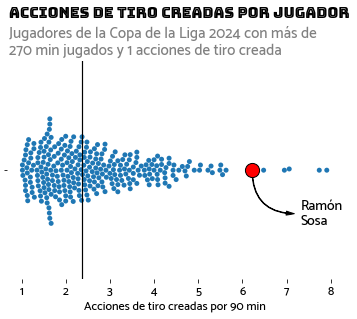

In [10]:
fig, ax = plt.subplots()
fig.set_facecolor('white')
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

sns.swarmplot(x='SCA90', data=df_filt, zorder=1)

nombre = 'Ramón Sosa'
valor = df_filt[df_filt['Player'] == nombre].SCA90.values[0]

plt.scatter(valor, 0, s=200, color='red', edgecolor='black', zorder=2)
plt.xlabel('Acciones de tiro creadas por 90 min', fontproperties=catamaran2.prop, size=12)
plt.xticks(fontproperties=catamaran2.prop, size=12)
plt.axvline(df_filt.SCA90.median(), lw=1.2, color='black')

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
a = patches.FancyArrowPatch((valor, 0), (valor+1, 0.2),
                             connectionstyle="arc3,rad=.5", **kw)

plt.gca().add_patch(a)

ax.text(valor+1.1, 0.2, nombre.replace(' ', '\n'), fontproperties=catamaran2.prop, size=14, va='center')

fig.text(.13, 1.05, 'Acciones de tiro creadas por jugador', fontproperties=titulo.prop, ha='left', va='center', size=15)
fig.text(.13, 0.95, 'Jugadores de la Copa de la Liga 2024 con más de\n270 min jugados y 1 acciones de tiro creada', fontproperties=catamaran2.prop, ha='left', va='center', size=15, color='grey')

plt.savefig('beeswarm.png', dpi=300, bbox_inches='tight')

plt.show()